In [1]:
import pandas as pd 
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

test = pd.read_csv('..\source\pred3.csv')
test

,DateTime,Open,Close,Predicted
0,2021-01-08,580.0,580.0,562.149658
1,2021-01-11,577.0,584.0,570.675110
2,2021-01-12,583.0,591.0,576.199524
3,2021-01-13,595.0,605.0,580.838501
4,2021-01-14,587.0,592.0,584.301941
5,2021-01-15,621.0,601.0,591.217041
6,2021-01-18,608.0,607.0,599.768433
7,2021-01-19,618.0,627.0,610.177734
8,2021-01-20,633.0,647.0,621.141785
9,2021-01-21,640.0,673.0,629.868958


In [2]:
test.loc[test.Close.shift(1) >= test.Close, "Trend"]= 0
test.loc[test.Close.shift(1) < test.Close, "Trend"]= 1
test['Trend']=test['Trend'].fillna(0).astype(int)
test.loc[test.Predicted.shift(1) >= test.Predicted, "PredTrend"]= 0
test.loc[test.Predicted.shift(1) < test.Predicted, "PredTrend"]= 1
test['PredTrend']=test['PredTrend'].fillna(0).astype(int)
test.loc[test.Predicted.shift(1) >= test.Close.shift(1), "PredvsTrend"]= 0
test.loc[test.Predicted.shift(1) < test.Close.shift(1), "PredvsTrend"]= 1
test['PredvsTrend']=test['PredvsTrend'].fillna(0).astype(int)
test

,DateTime,Open,Close,Predicted,Trend,PredTrend,PredvsTrend
0,2021-01-08,580.0,580.0,562.149658,0,0,0
1,2021-01-11,577.0,584.0,570.675110,1,1,1
2,2021-01-12,583.0,591.0,576.199524,1,1,1
3,2021-01-13,595.0,605.0,580.838501,1,1,1
4,2021-01-14,587.0,592.0,584.301941,0,1,1
5,2021-01-15,621.0,601.0,591.217041,1,1,1
6,2021-01-18,608.0,607.0,599.768433,1,1,1
7,2021-01-19,618.0,627.0,610.177734,1,1,1
8,2021-01-20,633.0,647.0,621.141785,1,1,1
9,2021-01-21,640.0,673.0,629.868958,1,1,1


In [3]:
test.corr()['PredTrend']

Open           0.134466
Close          0.148419
Predicted      0.097943
Trend          0.268529
PredTrend      1.000000
PredvsTrend    0.372705
Name: PredTrend, dtype: float64

In [4]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(test.Trend, test.PredTrend)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(test.Trend, test.PredTrend)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(test.Trend, test.PredTrend)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test.Trend, test.PredTrend)
print('F1 score: %f' % f1)

Accuracy: 0.638430
Precision: 0.581818
Recall: 0.606635
F1 score: 0.593968


In [5]:
test['status'] = test.PredTrend.shift(1).fillna(0).astype(int)
test['status2']=test.status
test.loc[( (test.status.shift(1)==0) & (test.status==1) ) & (test.Close.shift(1)<=test.Close.shift(2)) & (test.Open <= test.Close.shift(1)) , "status2"]= 0
test.loc[( (test.status.shift(1)==1) & (test.status==0) ) & (test.Close.shift(1)>=test.Close.shift(2)) & (test.Open <= test.Close.shift(1)) , "status2"]= 1
# test['status2']=test['status2'].fillna(0).astype(int)
# test['status2']=test['status2']

# 做一條predict的均線試看看

test['status3']= test.PredvsTrend.shift(1).fillna(0).astype(int)
test.loc[( (test.PredvsTrend.shift(1)==0) & (test.PredvsTrend==1) ) & (test.Close.shift(1)<=test.Close.shift(2)) & (test.Open <= test.Close.shift(1)) , "status3"]= 0
test.loc[( (test.PredvsTrend.shift(1)==1) & (test.PredvsTrend==0) ) & (test.Close.shift(1)>=test.Close.shift(2)) & (test.Open <= test.Close.shift(1)) , "status3"]= 1



# .shift(1)是前一個

test['buy_cost'] = test.Open[np.where((test.status3 == 1) * (test.status3.shift(1) == 0))[0]]
test['sell_cost'] = test.Open[np.where((test.status3 == 0) * (test.status3.shift(1) == 1))[0]]
test

,DateTime,Open,Close,Predicted,Trend,PredTrend,PredvsTrend,status,status2,status3,buy_cost,sell_cost
0,2021-01-08,580.0,580.0,562.149658,0,0,0,0,0,0,NaN,NaN
1,2021-01-11,577.0,584.0,570.675110,1,1,1,0,0,0,NaN,NaN
2,2021-01-12,583.0,591.0,576.199524,1,1,1,1,1,1,583.0,NaN
3,2021-01-13,595.0,605.0,580.838501,1,1,1,1,1,1,NaN,NaN
4,2021-01-14,587.0,592.0,584.301941,0,1,1,1,1,1,NaN,NaN
5,2021-01-15,621.0,601.0,591.217041,1,1,1,1,1,1,NaN,NaN
6,2021-01-18,608.0,607.0,599.768433,1,1,1,1,1,1,NaN,NaN
7,2021-01-19,618.0,627.0,610.177734,1,1,1,1,1,1,NaN,NaN
8,2021-01-20,633.0,647.0,621.141785,1,1,1,1,1,1,NaN,NaN
9,2021-01-21,640.0,673.0,629.868958,1,1,1,1,1,1,NaN,NaN


In [6]:
test = test.fillna(0)
buy_cost = np.array(test.buy_cost[test.buy_cost != 0])
sell_price = np.array(test.sell_cost[test.sell_cost != 0])
buy_cost

array([583. , 638. , 621. , 588. , 585. , 614. , 606. , 588. , 600. ,
       614. , 605. , 606. , 579. , 567. , 570. , 580. , 607. , 598. ,
       598. , 582. , 613. , 591. , 583. , 598. , 590. , 568. , 579. ,
       634. , 619. , 603. , 588. , 595. , 574. , 570. , 598. , 611. ,
       605. , 606. , 606. , 639. , 635. , 603. , 574. , 583. , 597. ,
       585. , 562. , 558. , 524. , 530. , 524. , 542. , 530. , 458. ,
       481. , 494. , 507. , 520. , 497.5, 488. , 476. , 408. , 406.5,
       381. , 441.5, 465. , 491.5])

In [7]:
if len(buy_cost) > len(sell_price) :
    buy_cost = buy_cost[:-1]

trade_return = sell_price / buy_cost - 1
fee = 0.002
net_trade_return = trade_return - fee

In [8]:
test['trade_ret'] = 0
test['net_trade_ret'] = 0
sell_dates = test.sell_cost[test.sell_cost != 0].index
test.loc[sell_dates, 'trade_ret'] = trade_return
test.loc[sell_dates, 'net_trade_ret'] = net_trade_return
test

,DateTime,Open,Close,Predicted,Trend,PredTrend,PredvsTrend,status,status2,status3,buy_cost,sell_cost,trade_ret,net_trade_ret
0,2021-01-08,580.0,580.0,562.149658,0,0,0,0,0,0,0.0,0.0,0.000000,0.000000
1,2021-01-11,577.0,584.0,570.675110,1,1,1,0,0,0,0.0,0.0,0.000000,0.000000
2,2021-01-12,583.0,591.0,576.199524,1,1,1,1,1,1,583.0,0.0,0.000000,0.000000
3,2021-01-13,595.0,605.0,580.838501,1,1,1,1,1,1,0.0,0.0,0.000000,0.000000
4,2021-01-14,587.0,592.0,584.301941,0,1,1,1,1,1,0.0,0.0,0.000000,0.000000
5,2021-01-15,621.0,601.0,591.217041,1,1,1,1,1,1,0.0,0.0,0.000000,0.000000
6,2021-01-18,608.0,607.0,599.768433,1,1,1,1,1,1,0.0,0.0,0.000000,0.000000
7,2021-01-19,618.0,627.0,610.177734,1,1,1,1,1,1,0.0,0.0,0.000000,0.000000
8,2021-01-20,633.0,647.0,621.141785,1,1,1,1,1,1,0.0,0.0,0.000000,0.000000
9,2021-01-21,640.0,673.0,629.868958,1,1,1,1,1,1,0.0,0.0,0.000000,0.000000


In [9]:
test['open_ret'] = test.Open / test.Open.shift(1) - 1
test['strategy_ret'] = test.status.shift(1) * test.open_ret
test['strategy_net_ret'] = test.strategy_ret
test.loc[sell_dates, 'strategy_net_ret'] = test.loc[sell_dates, 'strategy_net_ret'] - fee
test = test.fillna(0)

In [10]:
test['buy_and_hold_equity'] = (test.open_ret + 1).cumprod()
test['strategy_equity'] = (test.strategy_ret + 1).cumprod()
test['strategy_net_equity'] = (test.strategy_net_ret + 1).cumprod()
test

,DateTime,Open,Close,Predicted,Trend,PredTrend,PredvsTrend,status,status2,status3,buy_cost,sell_cost,trade_ret,net_trade_ret,open_ret,strategy_ret,strategy_net_ret,buy_and_hold_equity,strategy_equity,strategy_net_equity
0,2021-01-08,580.0,580.0,562.149658,0,0,0,0,0,0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
1,2021-01-11,577.0,584.0,570.675110,1,1,1,0,0,0,0.0,0.0,0.000000,0.000000,-0.005172,-0.000000,-0.000000,0.994828,1.000000,1.000000
2,2021-01-12,583.0,591.0,576.199524,1,1,1,1,1,1,583.0,0.0,0.000000,0.000000,0.010399,0.000000,0.000000,1.005172,1.000000,1.000000
3,2021-01-13,595.0,605.0,580.838501,1,1,1,1,1,1,0.0,0.0,0.000000,0.000000,0.020583,0.020583,0.020583,1.025862,1.020583,1.020583
4,2021-01-14,587.0,592.0,584.301941,0,1,1,1,1,1,0.0,0.0,0.000000,0.000000,-0.013445,-0.013445,-0.013445,1.012069,1.006861,1.006861
5,2021-01-15,621.0,601.0,591.217041,1,1,1,1,1,1,0.0,0.0,0.000000,0.000000,0.057922,0.057922,0.057922,1.070690,1.065180,1.065180
6,2021-01-18,608.0,607.0,599.768433,1,1,1,1,1,1,0.0,0.0,0.000000,0.000000,-0.020934,-0.020934,-0.020934,1.048276,1.042882,1.042882
7,2021-01-19,618.0,627.0,610.177734,1,1,1,1,1,1,0.0,0.0,0.000000,0.000000,0.016447,0.016447,0.016447,1.065517,1.060034,1.060034
8,2021-01-20,633.0,647.0,621.141785,1,1,1,1,1,1,0.0,0.0,0.000000,0.000000,0.024272,0.024272,0.024272,1.091379,1.085763,1.085763
9,2021-01-21,640.0,673.0,629.868958,1,1,1,1,1,1,0.0,0.0,0.000000,0.000000,0.011058,0.011058,0.011058,1.103448,1.097770,1.097770


Text(0, 0.5, 'strategy_equity')

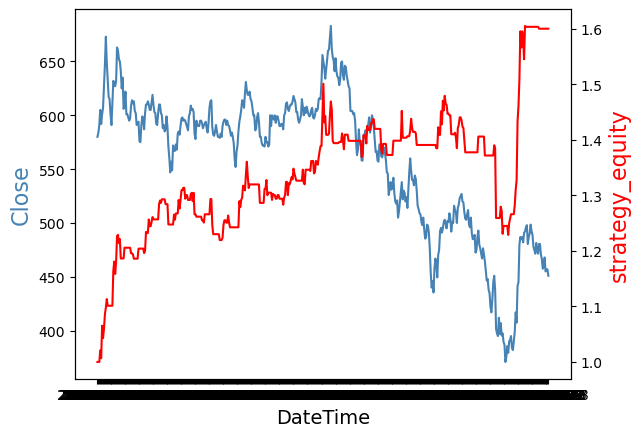

In [11]:
import matplotlib.pyplot as plt
col1 = 'steelblue'
col2 = 'red'
col3 = 'green'
fig2,ax = plt.subplots()
ax.plot(test.DateTime, test.Close, color=col1)
ax.set_xlabel('DateTime', fontsize=14)
ax.set_ylabel('Close', color=col1, fontsize=16)
ax2 = ax.twinx()
ax2.plot(test.DateTime, test.strategy_equity, color=col2)
ax2.set_ylabel('strategy_equity', color=col2, fontsize=16)

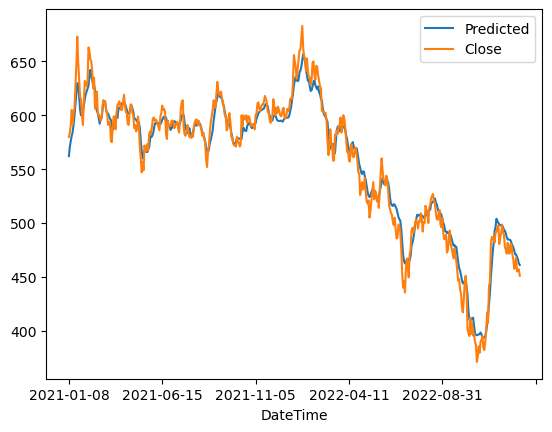

In [12]:
plot=test.plot(x='DateTime',y=['Predicted','Close'])
fig = plot.get_figure()